In [4]:
install.packages(c('dplyr', 'vcd'))
library(dplyr)
library(vcd)

also installing the dependency ‘lmtest’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: grid


     sex      agegroup  click    
 male  :340   10s:205   no :889  
 female:318   20s:170   yes:111  
 other :342   30s:202            
              40s:209            
              50s:214            


Call:
glm(formula = click ~ sex + agegroup + sex:agegroup, family = "binomial", 
    data = ad_click)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.6576  -0.5476  -0.4512  -0.3406   2.8179  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -2.8622     0.5141  -5.568 2.58e-08 ***
sexfemale               0.6286     0.6699   0.938   0.3481    
sexother                0.8308     0.6369   1.304   0.1921    
agegroup20s             0.3167     0.7307   0.433   0.6647    
agegroup30s             1.4408     0.5941   2.425   0.0153 *  
agegroup40s             1.0341     0.6271   1.649   0.0992 .  
agegroup50s             0.7520     0.6360   1.182   0.2370    
sexfemale:agegroup20s   0.2683     0.9152   0.293   0.7694    
sexother:agegroup20s   -2.2365     1.3017  -1.718   0.0858 .  
sexfemale:agegroup30s  -0.6595     0.8060  -0.818   0.4132    
sexother:agegroup30s   -1.1224     0.7757  -1.447   0.1479    
sexfemale:ag

(Intercept)             sexfemale              sexother 
           0.05714286            1.87500000            2.29508197 
          agegroup20s           agegroup30s           agegroup40s 
           1.37254902            4.22413793            2.81250000 
          agegroup50s sexfemale:agegroup20s  sexother:agegroup20s 
           2.12121212            1.30769231            0.10683379 
sexfemale:agegroup30s  sexother:agegroup30s sexfemale:agegroup40s 
           0.51712259            0.32551020            0.33747646 
 sexother:agegroup40s sexfemale:agegroup50s  sexother:agegroup50s 
           0.43856209            0.26268657            0.22120879

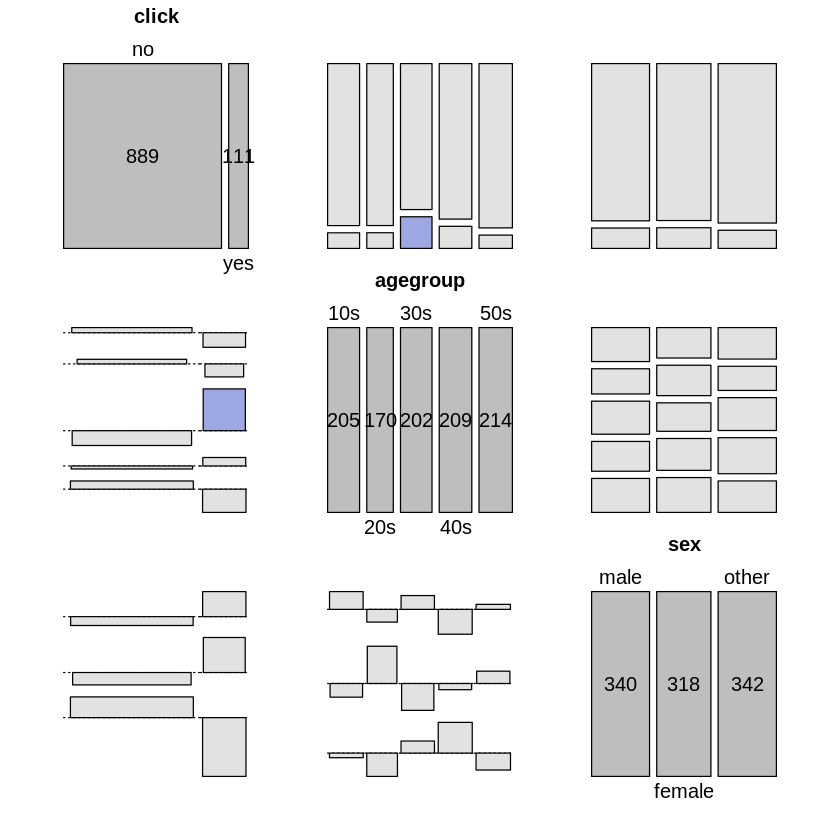

In [6]:
samplesize <- 1000
sex <- factor(floor(runif(n = samplesize, min = 0, max = 3)), labels = c("male", "female", "other"))
agegroup <- factor(floor(runif(n = samplesize, min = 0, max = 5)), labels = c("10s", "20s", "30s", "40s", "50s"))
d <- data.frame(sex, agegroup)


In [14]:
# 偏りのないデータ
ad_click <- d %>% mutate(
  click = factor(case_when(
    TRUE ~ rbinom(n(), 1, 0.1)
  )
  , labels = c('no', 'yes')
  )
)

In [15]:
# 偏りのあるデータ(交互作用なし)
ad_click <- d %>% mutate(
  click = factor(case_when(
    sex == 'female' ~ rbinom(n(), 1, 0.2)
    , TRUE ~ rbinom(n(), 1, 0.1)
  )
  , labels = c('no', 'yes')
  )
)

In [16]:
# 偏りのあるデータ(交互作用あり)
ad_click <- d %>% mutate(
  click = factor(case_when(
    sex == 'female' & agegroup == '20s' ~ rbinom(n(), 1, 0.2)
    , TRUE ~ rbinom(n(), 1, 0.1)
  )
  , labels = c('no', 'yes')
  )
)

In [17]:
# 偏りのあるデータ(単純作用+交互作用)
ad_click <- d %>% mutate(
  click = factor(case_when(
    sex == 'female' & agegroup == '20s' ~ rbinom(n(), 1, 0.2)
    , agegroup == '30s' ~ rbinom(n(), 1, 0.2)
    , TRUE ~ rbinom(n(), 1, 0.1)
  )
  , labels = c('no', 'yes')
  )
)

In [9]:
summary(ad_click)

     sex      agegroup  click    
 male  :340   10s:205   no :889  
 female:318   20s:170   yes:111  
 other :342   30s:202            
              40s:209            
              50s:214            

In [12]:
# modeling
ad_click.glm <- glm(formula = click ~ sex + agegroup + sex:agegroup, data = ad_click, family="binomial")
summary(ad_click.glm)


Call:
glm(formula = click ~ sex + agegroup + sex:agegroup, family = "binomial", 
    data = ad_click)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.6576  -0.5476  -0.4512  -0.3406   2.8179  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -2.8622     0.5141  -5.568 2.58e-08 ***
sexfemale               0.6286     0.6699   0.938   0.3481    
sexother                0.8308     0.6369   1.304   0.1921    
agegroup20s             0.3167     0.7307   0.433   0.6647    
agegroup30s             1.4408     0.5941   2.425   0.0153 *  
agegroup40s             1.0341     0.6271   1.649   0.0992 .  
agegroup50s             0.7520     0.6360   1.182   0.2370    
sexfemale:agegroup20s   0.2683     0.9152   0.293   0.7694    
sexother:agegroup20s   -2.2365     1.3017  -1.718   0.0858 .  
sexfemale:agegroup30s  -0.6595     0.8060  -0.818   0.4132    
sexother:agegroup30s   -1.1224     0.7757  -1.447   0.1479    
sexfemale:ag

In [11]:
exp(coef(ad_click.glm))

(Intercept)             sexfemale              sexother 
           0.05714286            1.87500000            2.29508197 
          agegroup20s           agegroup30s           agegroup40s 
           1.37254902            4.22413793            2.81250000 
          agegroup50s sexfemale:agegroup20s  sexother:agegroup20s 
           2.12121212            1.30769231            0.10683379 
sexfemale:agegroup30s  sexother:agegroup30s sexfemale:agegroup40s 
           0.51712259            0.32551020            0.33747646 
 sexother:agegroup40s sexfemale:agegroup50s  sexother:agegroup50s 
           0.43856209            0.26268657            0.22120879

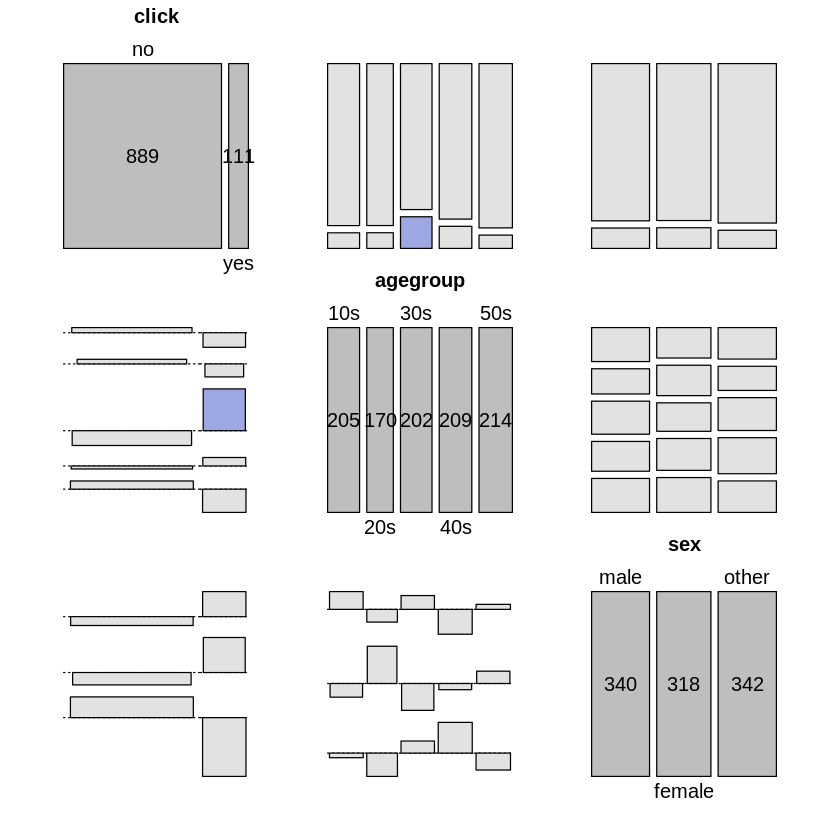

In [7]:
# visualization
crosstab <- xtabs(~ click + agegroup + sex, data=ad_click)
pairs(crosstab, lower_panel= vcd::pairs_assoc, shade=TRUE)# https://www.slideshare.net/KumarP34/using-r-for-customer-segmentation